C:\Users\Jeff\AppData\Local\Temp\ipykernel_14304\2150711192.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[c_y] = data_y[c_y].fillna(data_y[c_y].mean())
C:\Users\Jeff\AppData\Local\Temp\ipykernel_14304\2150711192.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_o[c_o] = data_o[c_o].fillna(data_o[c_o].mean())


Text(0.5, 1.0, 'RT')

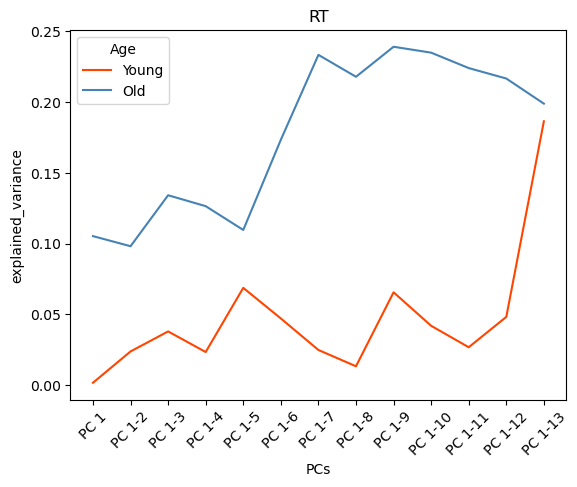

In [4]:
import pandas as pd
import pingouin as pg
import numpy as np
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt

# Change manually which task to run
task = 'RT'

# load VBM data, and separate old and young
data=pd.read_csv(task + '_1feature.csv')
data_y = data.loc[data['Group']==1]
data_o = data.loc[data['Group']==2]

# impute NA data with mean - young
c_y = data_y.select_dtypes(np.number).columns
data_y[c_y] = data_y[c_y].fillna(data_y[c_y].mean())
data_y.to_csv(task + '_y_impute.csv')

# impute NA data with mean - old
c_o = data_o.select_dtypes(np.number).columns
data_o[c_o] = data_o[c_o].fillna(data_o[c_o].mean())
data_o.to_csv(task + '_o_impute.csv')


# code from Dario
# Run PCA on EEG features, then use linear regression to determine if PCs can explain the variance in behavior,
# adding a new PC each time.
# loop through young and old
for i in range(2):
    if i == 0:
        data=pd.read_csv(task + '_y_impute.csv')
    else:
        data=pd.read_csv(task + '_o_impute.csv')

    # X: EEG features; y: behavior
    X = data.iloc[:,4:17]
    y = data.iloc[:,3]

    # do PCA to the data, with 13 components
    t = PowerTransformer().fit_transform(X)
    pct = PCA(13).fit_transform(t)

    X_model = pd.DataFrame(pct)
    # put each component in PCR model
    adj_r2_models = []
    #comps_reg = X_model.columns
    comps_reg = X_model.columns       
    
    # run model each time adding a new component and calculate adjusted R2 using statsmodels
    for in_pcr in range(len(comps_reg)):

        X_reg = sm.add_constant(X_model[comps_reg[0:in_pcr+1]], prepend='False')
        mod = sm.OLS(y, X_reg)
        res = mod.fit()
        adj_r2_models.append(res.rsquared_adj)
            
    # save PCR results
    index_df = ['PC 1-' + str(i+1) for i in range(len(adj_r2_models))]
    index_df[0] = 'PC 1'

    # plot the results
    plt.xlabel('PCs')
    plt.ylabel('explained_variance')
    plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12],index_df,rotation=45)
    if i == 0:
        plt.plot(adj_r2_models,color='orangered')
    else:
        plt.plot(adj_r2_models,color='steelblue')

plt.legend(['Young','Old'],title='Age')
plt.title(task)

In [2]:
X

,GFP,N1,N2,P3b,Q_N1,Q_N2,Q_P3b,CD_N1,CD_N2,CD_P3b,PCE_N1,PCE_N2,PCE_P3b
0,0.245797,0.666084,-0.904443,-0.132889,-0.992245,-0.528425,0.433187,0.947690,-0.236773,0.407619,0.234158,-0.529868,-0.247015
1,-0.659019,0.047690,0.899825,-0.008587,0.400122,0.033650,-0.028891,0.625498,0.974654,0.578695,-0.790060,0.643949,0.183182
2,-0.635088,-1.636880,1.594200,0.353270,-0.776788,0.165524,-0.094063,0.237470,1.537376,1.227093,-1.146247,-1.032591,0.423372
3,-0.371908,-0.054133,0.772017,1.174922,-1.398367,-3.317401,-1.627176,-0.325936,-0.524058,1.618255,-0.417568,1.176134,2.022338
4,-0.491540,0.028472,0.671974,0.511274,0.003934,0.079467,0.279253,-0.862858,0.982256,0.690998,-0.521427,0.246956,0.644254
5,0.631550,0.900654,-1.560644,0.151731,-0.585212,0.126114,-0.408732,1.386922,0.299576,-0.089779,-0.062774,-1.107198,-1.408302
6,-0.379744,-0.186153,-0.387474,0.156815,-0.478008,-0.620181,0.093764,-0.683591,-1.052258,-0.095672,-1.738316,-1.909217,-1.443439
7,0.097723,0.542722,-1.325182,0.009355,-0.098334,-0.798785,-2.284483,0.505677,-0.375884,-0.512066,-0.948528,0.114987,0.895897
8,-0.182690,-0.147631,1.483327,0.005057,-0.402371,-0.318801,0.769468,0.054891,0.665788,0.358964,-0.333594,-0.481328,-1.469329
9,-1.239489,-0.907171,1.805373,-1.045102,0.099757,-0.541597,0.142048,-0.735923,1.757875,0.280784,-1.077855,0.206236,0.166362
